In [11]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats
import ipyvolume.pylab as ipv

fs = 12

directory = "/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128/more_t500"
filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(False,False,True))
Nx,Ny,Nz,Lx,Ly,Lz,dx,dy,dz,kx,kz = stats.domain(reader,verbose=1)
steps = sorted(reader.steps)

print("Steps: {}".format(steps))

Domain size: 172.0 x 257.328125 x 82.0
Grid size: 256 x 384 x 128
Grid res: 0.671875 x 0.671875 x 0.640625
Steps: [0, 3, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]


In [12]:
def iso_surf(reader,step,qname,level):
    reader.step = step
    print("Time: {}".format(reader.time))

    if qname=='q':
        data = np.load(directory+"/shearlayer_%04d_criterion_q.npy"%step)
    elif qname=='lambda2':
        data = np.load(directory+"/shearlayer_%04d_criterion_lambda2.npy"%step)
        #data = data<0
        #level = True
    else:
        data = reader.readData(qname)
    data = np.squeeze(np.array(data))
    print("Min and max values: {},{}".format(np.amax(data),np.amin(data)) )
    
    ipv.figure(key=None, width=800, height=800, lighting=True)
    m = ipv.plot_isosurface(data, level=level, color='#8cd1c0', wireframe=False, 
                            surface=True, controls=True, extent=None)
    ipv.xlim(0, Nx)
    ipv.ylim(0, Ny)
    ipv.zlim(0, Nz)
    ipv.style.box_off()
    ipv.style.axes_off()

    ipv.view(azimuth=-75, elevation=75)
    ipv.show()   

step = 63
iso_surf(reader,step,'q',1e-3)

Time: 630.0
Min and max values: 0.127359292375,-0.14351072001


VkJveChjaGlsZHJlbj0oRmlndXJlKGNhbWVyYT1QZXJzcGVjdGl2ZUNhbWVyYShmb3Y9NDYuMCwgcG9zaXRpb249KC0wLjQ5OTk5OTk5OTk5OTk5OTk0LCAxLjkzMTg1MTY1MjU3ODEzNjYsIDDigKY=


Min and max values of pdil: 0.022049553485,4.39520116984e-15
Time: 1200.0
Min and max values of contour: 0.0439407518668,-0.216435737213


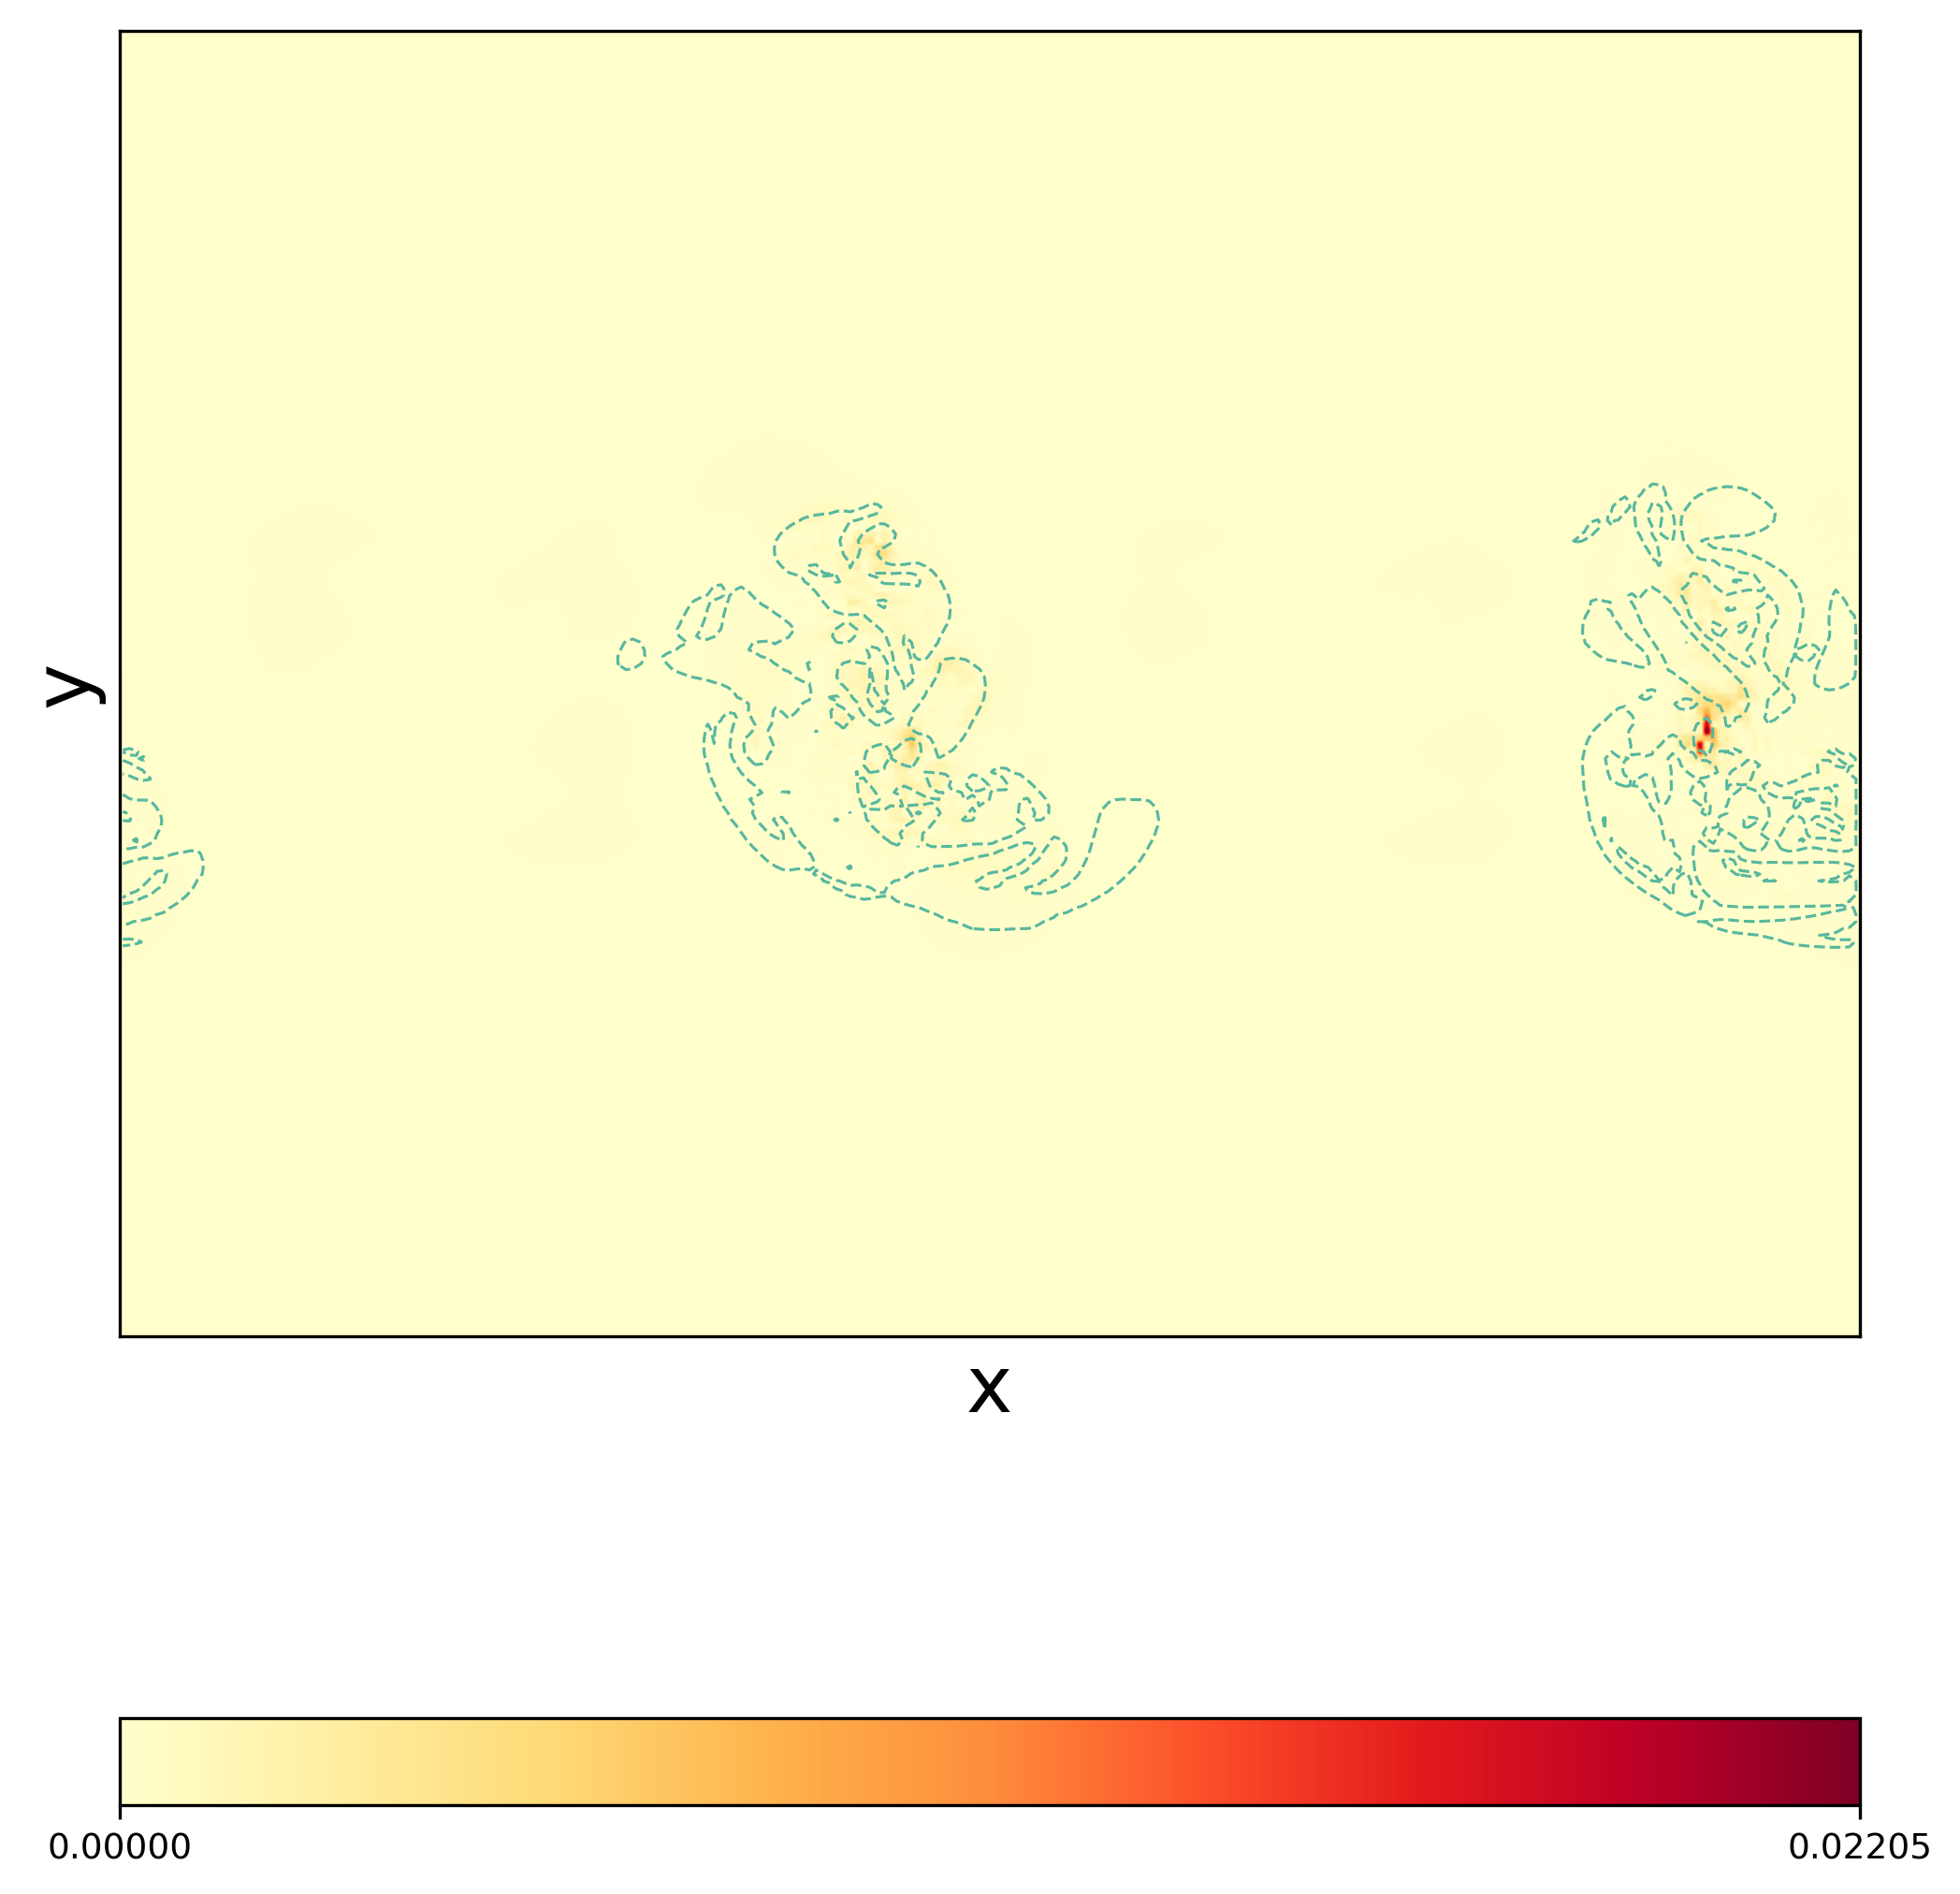

In [384]:
# Plot xy slice overlaid with dilatation contours
def plot_pdil_xy(step,zslice):
    fname = directory + "/shearlayer_%04d_dilatation.npy"%step
    data = np.load(fname)
    data = np.transpose(np.squeeze(data[:,:,zslice]))
    data = abs(data)
    print("Min and max values of pdil: {},{}".format(np.amax(data),np.amin(data)) )

    fact = 30
    fig = plt.figure(figsize=(Nx/fact,Ny/fact),dpi=300)
    im=plt.imshow(data,cmap='YlOrRd',interpolation='kaiser')
    maxval = np.amax(data);
    minval = np.amin(data);
    cbar = plt.colorbar(im,ticks=[minval, maxval],orientation='horizontal')
    cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
    cbar.ax.tick_params(labelsize=0.75*fs)
    
def iso_cont_xy(reader,step,zslice,qname,level,savename=''):
    reader.step = step
    print("Time: {}".format(reader.time))

    if qname=='q':
        data = np.load(directory+"/shearlayer_%04d_criterion_q.npy"%step)
    elif qname=='lambda2':
        data = np.load(directory+"/shearlayer_%04d_criterion_lambda2.npy"%step)
    else:
        data = reader.readData(qname)
    data = np.squeeze(np.array(data))
    data = data[:,:,zslice]
    data = np.transpose(data)
    print("Min and max values of contour: {},{}".format(np.amax(data),np.amin(data)) )

    plt.contour(data,levels=level,colors='#58b79f',linewidths=0.75)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('y',fontsize=20)
    plt.xlabel('x',fontsize=20)
    plt.ylim([Ny/4,3*Ny/4])
    plt.show()


    
zslice = Nz/2
step = 12

plot_pdil_xy(step,zslice)
iso_cont_xy(reader,step,zslice,'lambda2',level=-1e-4,savename='')


Min and max values of pdil: 0.00513619809639,6.10602970107e-09
Time: 1200.0
Min and max values of contour: 0.0292712925486,-0.15066440926


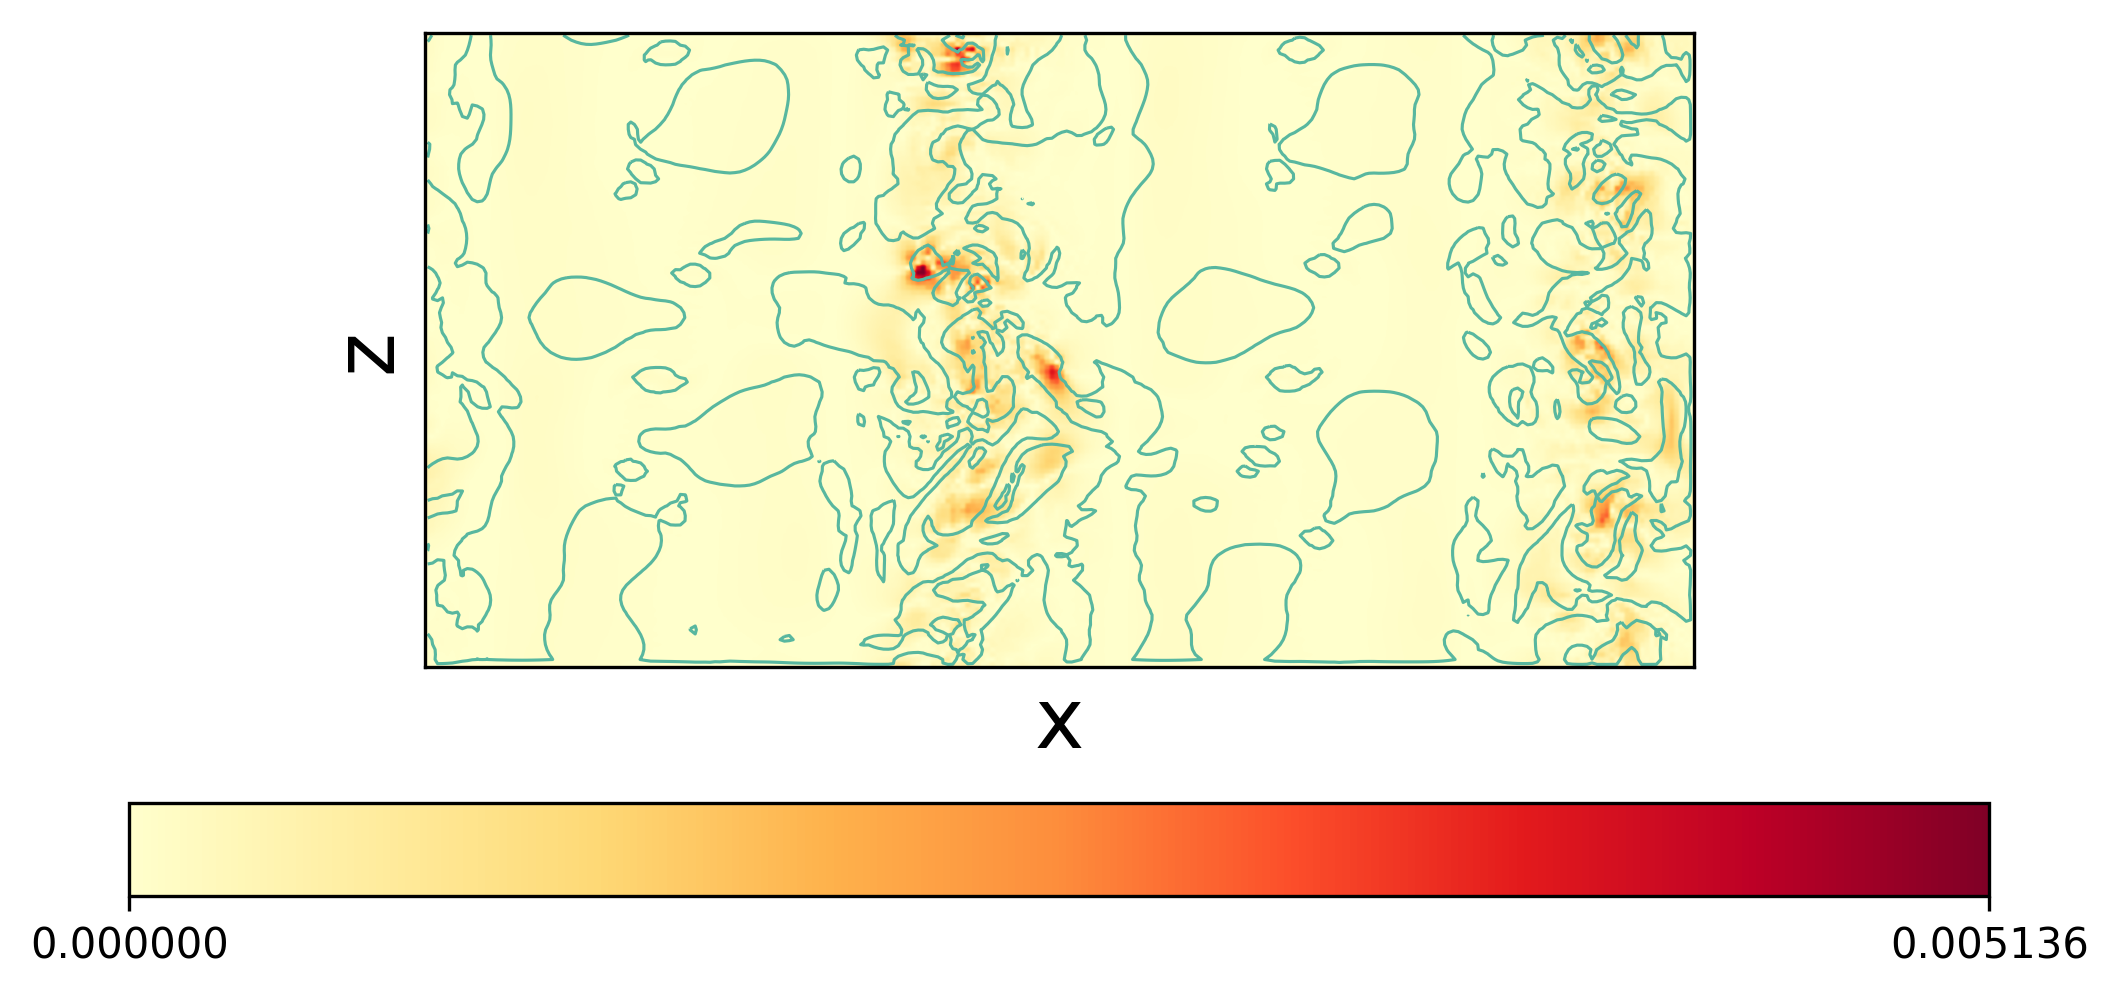

In [383]:
# Plot xy slice overlaid with dilatation contours
def plot_pdil_xz(step,yslice):
    fname = directory + "/shearlayer_%04d_dilatation.npy"%step
    data = np.load(fname)
    data = np.transpose(np.squeeze(data[:,yslice,:]))
    data = abs(data)
    print("Min and max values of pdil: {},{}".format(np.amax(data),np.amin(data)) )

    fact = 30
    fig = plt.figure(figsize=(Nx/fact,Nz/fact),dpi=300)
    im =plt.imshow(data,cmap='YlOrRd',interpolation='kaiser')
    maxval = np.amax(data);
    minval = np.amin(data);
    cbar = plt.colorbar(im,ticks=[minval, maxval],orientation='horizontal')
    #cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
    #cbar.ax.tick_params(labelsize=0.75*fs)
    
def iso_cont_xz(reader,step,yslice,qname,level,savename=''):
    reader.step = step
    print("Time: {}".format(reader.time))

    if qname=='q':
        data = np.load(directory+"/shearlayer_%04d_criterion_q.npy"%step)
    elif qname=='lambda2':
        data = np.load(directory+"/shearlayer_%04d_criterion_lambda2.npy"%step)
    else:
        data = reader.readData(qname)
    data = np.squeeze(np.array(data))
    data = data[:,yslice,:]
    data = np.transpose(data)
    print("Min and max values of contour: {},{}".format(np.amax(data),np.amin(data)) )
    
    plt.contour(data,levels=level,colors='#58b79f',linewidths=0.75)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('z',fontsize=20)
    plt.xlabel('x',fontsize=20)
    

    
yslice = int(Ny/2)
step = 12

plot_pdil_xz(step,yslice)
iso_cont_xz(reader,step,yslice,'lambda2',1e-4,savename='')
